In [20]:
import numpy as np


def main():

    num_people = 5000
    num_steps = 5000

    step_sizes = np.random.random((num_people, num_steps))
    coin_tosses = np.random.choice([-1, 1], (num_people, num_steps))

    positions = np.sum(step_sizes * coin_tosses, axis=1)

    for i in range(num_people):
        print("Position of", i+1, "person is:", positions[i])

main()

Position of 1 person is: 17.650900947082114
Position of 2 person is: -88.08485500734938
Position of 3 person is: 8.15070836266644
Position of 4 person is: 0.5841129300522283
Position of 5 person is: 15.263482456663324
Position of 6 person is: 1.086357202338755
Position of 7 person is: -17.674031045302105
Position of 8 person is: 25.63570420776552
Position of 9 person is: -10.482295558542617
Position of 10 person is: -13.534621584201517
Position of 11 person is: 13.436468016989739
Position of 12 person is: -3.5336264639153576
Position of 13 person is: 18.181713844195563
Position of 14 person is: -34.202957601090375
Position of 15 person is: -32.89299026886182
Position of 16 person is: 15.14535608427408
Position of 17 person is: -90.55283470192714
Position of 18 person is: -52.63164411513177
Position of 19 person is: -66.08748430706702
Position of 20 person is: 8.45439240508254
Position of 21 person is: -42.62977367948355
Position of 22 person is: -7.831287489952001
Position of 23 person

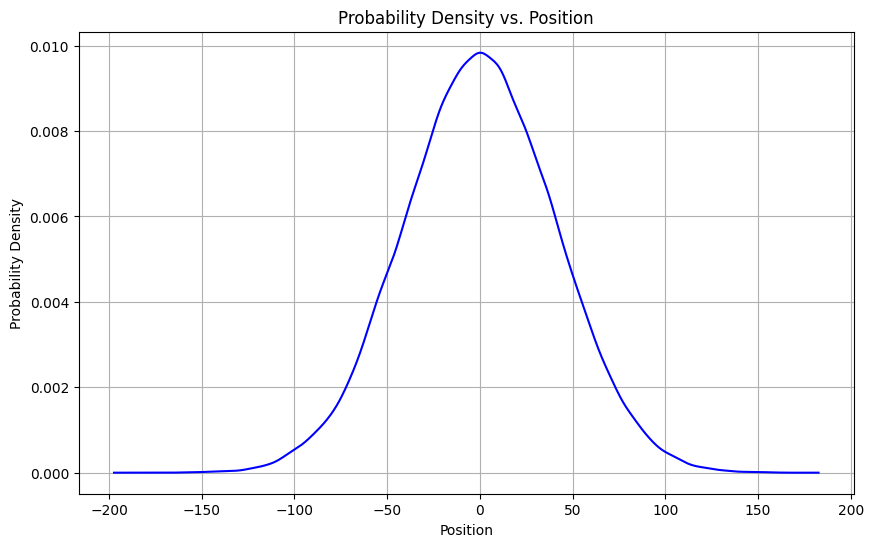

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def main():
    num_people = 100000
    num_steps = 5000
    step_sizes = np.random.random((num_people, num_steps))
    coin_tosses = np.random.choice([-1, 1], (num_people, num_steps))
    positions = np.sum(step_sizes * coin_tosses, axis=1)
    np.savetxt("positions.txt", positions)

    kde = gaussian_kde(positions)
    position_values = np.linspace(positions.min(), positions.max(), 1000)
    probabilities = kde(position_values)

    plt.figure(figsize=(10, 6))
    plt.plot(position_values, probabilities, color='b')
    plt.xlabel('Position')
    plt.ylabel('Probability Density')
    plt.title('Probability Density vs. Position')
    plt.grid(True)
    plt.show()

main()


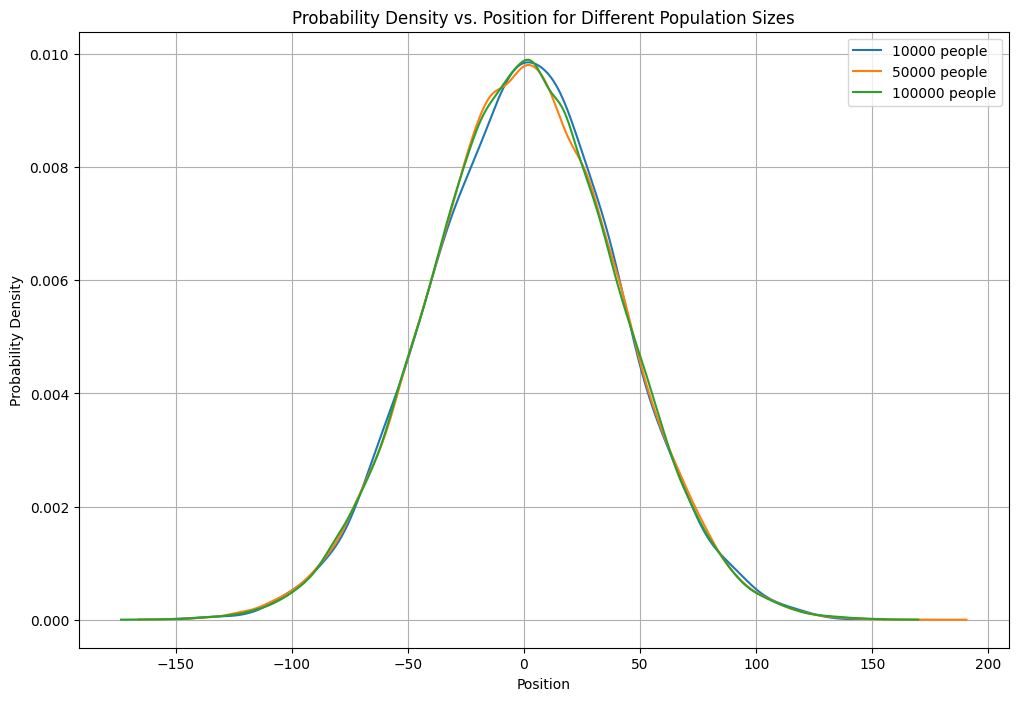

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def simulate_positions(num_people, num_steps=500):
    step_sizes = np.random.random((num_people, num_steps))
    coin_tosses = np.random.choice([-1, 1], (num_people, num_steps))
    positions = np.sum(step_sizes * coin_tosses, axis=1)
    return positions

def plot_probability_density(positions, label):
    kde = gaussian_kde(positions)
    position_values = np.linspace(positions.min(), positions.max(), 1000)
    probabilities = kde(position_values)
    plt.plot(position_values, probabilities, label=label)

def main():
    num_steps = 5000
    populations = [10000, 50000, 100000]

    plt.figure(figsize=(12, 8))

    for num_people in populations:
        positions = simulate_positions(num_people, num_steps)
        plot_probability_density(positions, label=f'{num_people} people')

    plt.xlabel('Position')
    plt.ylabel('Probability Density')
    plt.title('Probability Density vs. Position for Different Population Sizes')
    plt.legend()
    plt.grid(True)
    plt.show()

main()



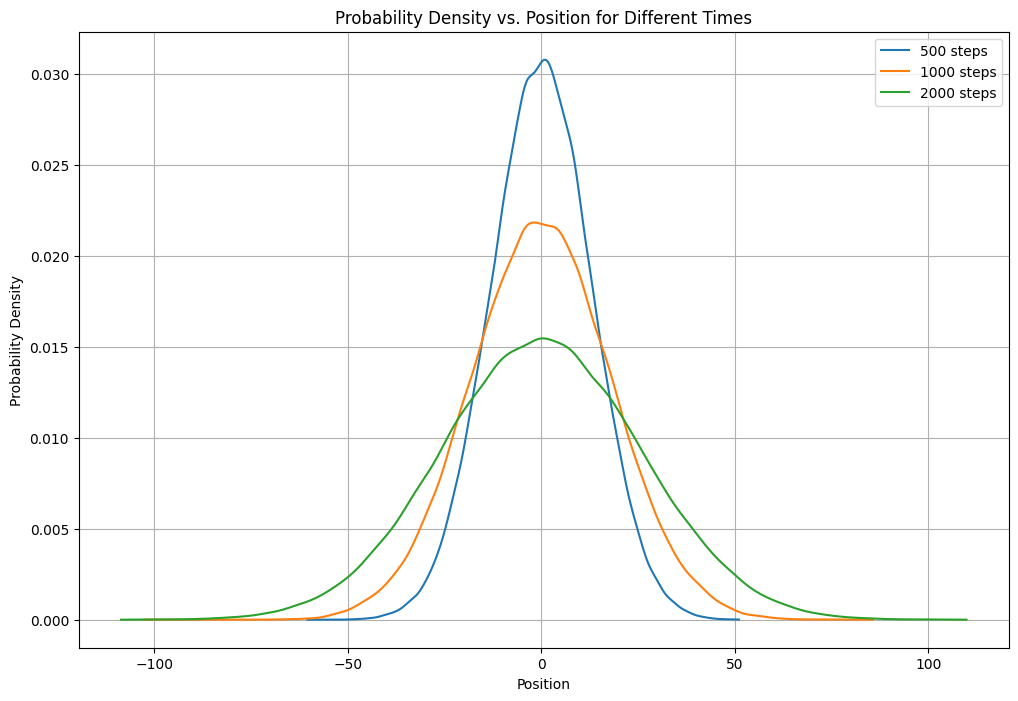

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def simulate_positions(num_people, num_steps):
    step_sizes = np.random.random((num_people, num_steps))
    coin_tosses = np.random.choice([-1, 1], (num_people, num_steps))
    positions = np.sum(step_sizes * coin_tosses, axis=1)
    return positions

def plot_probability_density(positions, label):
    kde = gaussian_kde(positions)
    position_values = np.linspace(positions.min(), positions.max(), 1000)
    probabilities = kde(position_values)
    plt.plot(position_values, probabilities, label=label)

def main():
    num_people = 100000
    steps_list = [500, 1000, 2000]
    plt.figure(figsize=(12, 8))
    for num_steps in steps_list:
        positions = simulate_positions(num_people, num_steps)
        plot_probability_density(positions, label=f'{num_steps} steps')
    plt.xlabel('Position')
    plt.ylabel('Probability Density')
    plt.title('Probability Density vs. Position for Different Times')
    plt.legend()
    plt.grid(True)
    plt.show()

main()


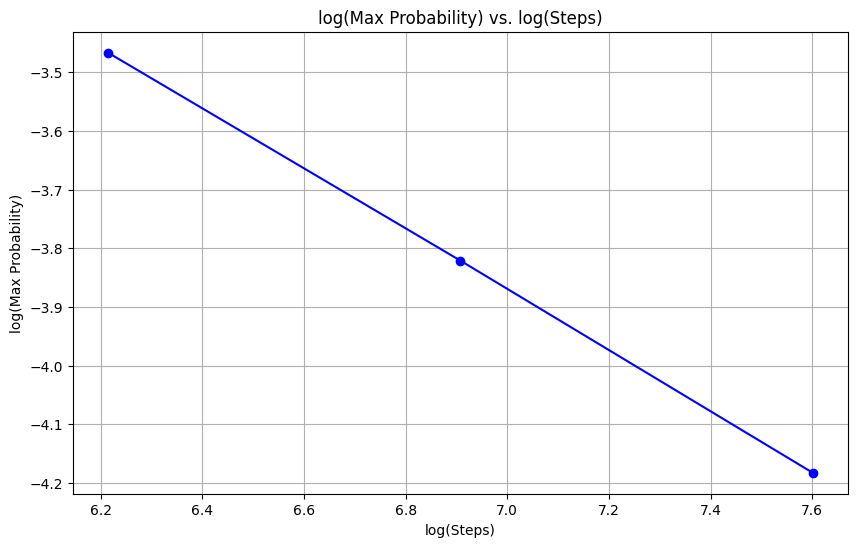

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def simulate_positions(num_people, num_steps):
    step_sizes = np.random.random((num_people, num_steps))
    coin_tosses = np.random.choice([-1, 1], (num_people, num_steps))
    positions = np.sum(step_sizes * coin_tosses, axis=1)
    return positions

def get_max_probability(positions):
    kde = gaussian_kde(positions)
    position_values = np.linspace(positions.min(), positions.max(), 1000)
    probabilities = kde(position_values)
    return probabilities.max()

def main():
    num_people = 10000
    steps_list = [500, 1000, 2000]
    max_probabilities = []

    for num_steps in steps_list:
        positions = simulate_positions(num_people, num_steps)
        max_prob = get_max_probability(positions)
        max_probabilities.append(max_prob)

    log_steps = np.log(steps_list)
    log_max_probabilities = np.log(max_probabilities)

    plt.figure(figsize=(10, 6))
    plt.plot(log_steps, log_max_probabilities, marker='o', linestyle='-', color='b')
    plt.xlabel('log(Steps)')
    plt.ylabel('log(Max Probability)')
    plt.title('log(Max Probability) vs. log(Steps)')
    plt.grid(True)
    plt.show()

main()



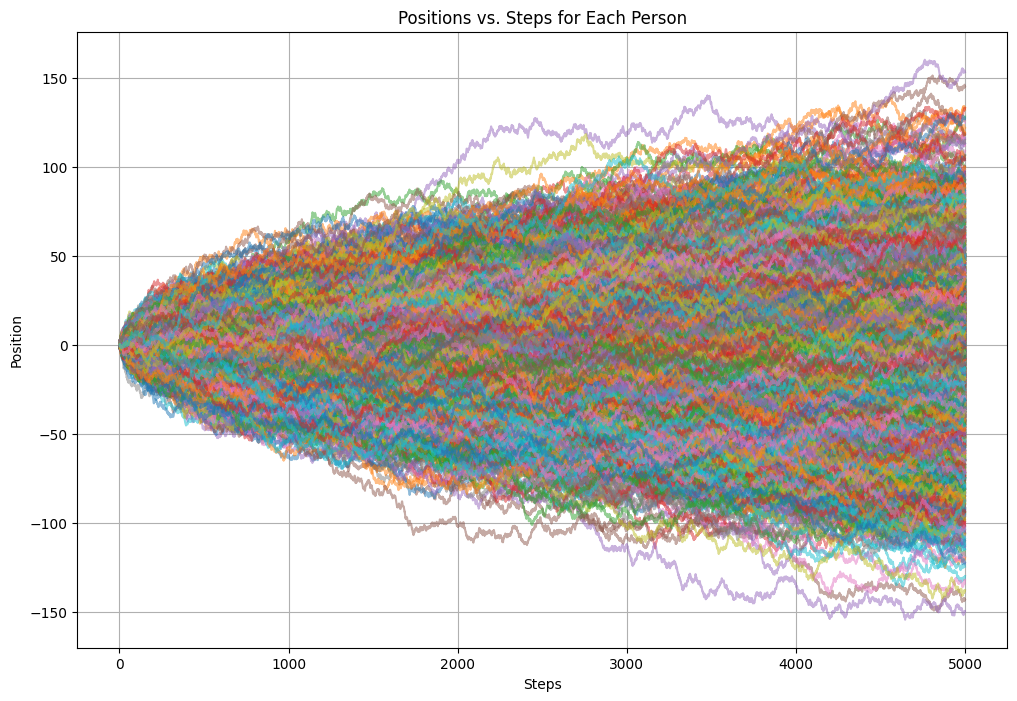

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_positions(num_people, num_steps):
    step_sizes = np.random.random((num_people, num_steps))
    coin_tosses = np.random.choice([-1, 1], (num_people, num_steps))
    positions = np.cumsum(step_sizes * coin_tosses, axis=1)
    return positions

def plot_positions_vs_steps(positions):
    num_people, num_steps = positions.shape
    plt.figure(figsize=(12, 8))
    for i in range(num_people):
        plt.plot(range(1, num_steps + 1), positions[i], alpha=0.5)
    plt.xlabel('Steps')
    plt.ylabel('Position')
    plt.title('Positions vs. Steps for Each Person')
    plt.grid(True)
    plt.show()

def main():
    num_people = 5000
    num_steps = 5000
    positions = simulate_positions(num_people, num_steps)
    plot_positions_vs_steps(positions)

main()

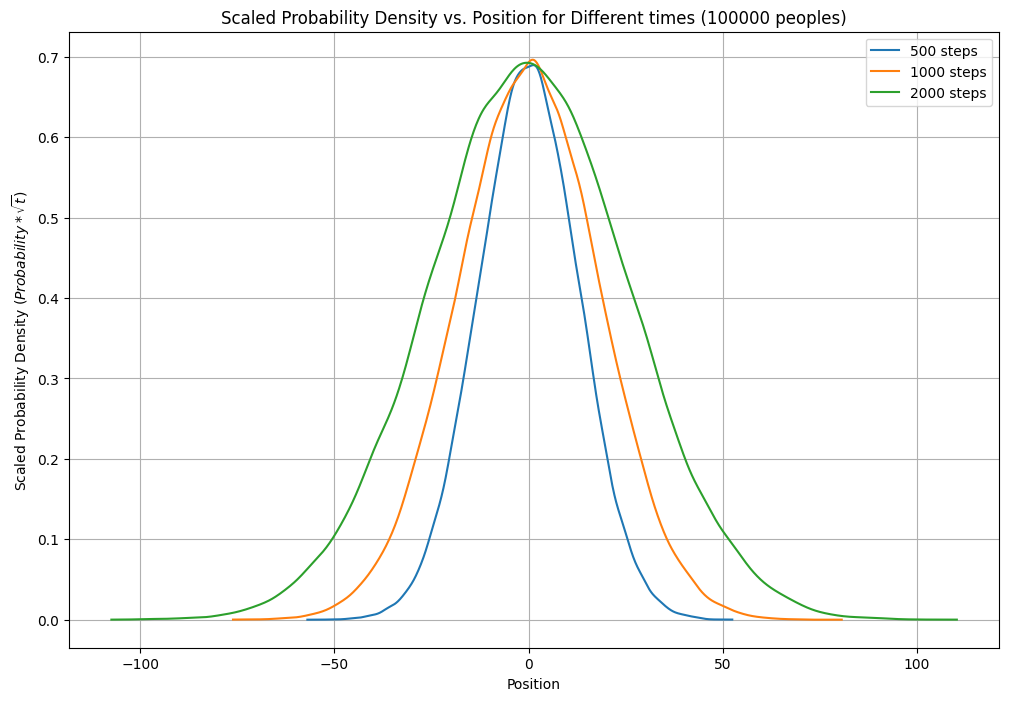

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def simulate_positions(num_people, num_steps):
    step_sizes = np.random.random((num_people, num_steps))
    coin_tosses = np.random.choice([-1, 1], (num_people, num_steps))
    positions = np.sum(step_sizes * coin_tosses, axis=1)
    return positions

def plot_probability_density(positions, num_steps, label):
    kde = gaussian_kde(positions)
    position_values = np.linspace(positions.min(), positions.max(), 1000)
    probabilities = kde(position_values)
    scaled_probabilities = probabilities * np.sqrt(num_steps)
    plt.plot(position_values, scaled_probabilities, label=label)

def main():
    num_people = 100000
    steps_list = [500, 1000, 2000]
    plt.figure(figsize=(12, 8))
    for num_steps in steps_list:
        positions = simulate_positions(num_people, num_steps)
        plot_probability_density(positions, num_steps, label=f'{num_steps} steps')
    plt.xlabel('Position')
    plt.ylabel('Scaled Probability Density ($ Probability * \sqrt{t} $)')
    plt.title('Scaled Probability Density vs. Position for Different times (100000 peoples)')
    plt.legend()
    plt.grid(True)
    plt.show()

main()


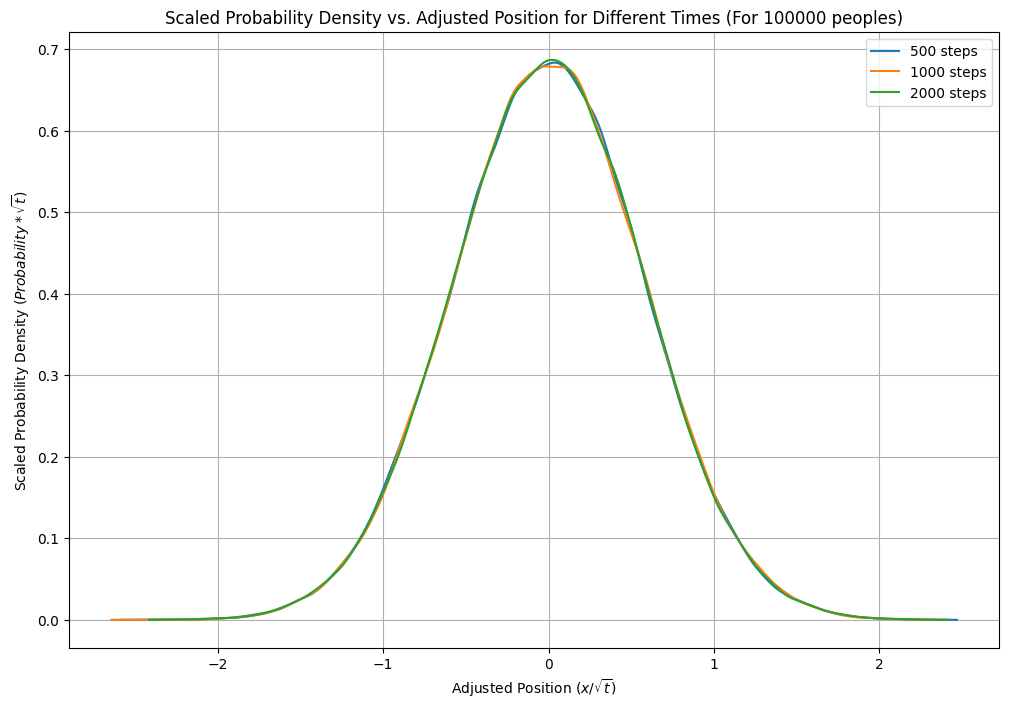

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def simulate_positions(num_people, num_steps):
    step_sizes = np.random.random((num_people, num_steps))
    coin_tosses = np.random.choice([-1, 1], (num_people, num_steps))
    positions = np.sum(step_sizes * coin_tosses, axis=1)
    return positions

def plot_probability_density(positions, num_steps, label):
    kde = gaussian_kde(positions)
    position_values = np.linspace(positions.min(), positions.max(), 1000)
    probabilities = kde(position_values)
    scaled_probabilities = probabilities * np.sqrt(num_steps)
    adjusted_positions = position_values / np.sqrt(num_steps)
    plt.plot(adjusted_positions, scaled_probabilities, label=label)

def main():
    num_people = 100000
    steps_list = [500, 1000, 2000]
    plt.figure(figsize=(12, 8))
    for num_steps in steps_list:
        positions = simulate_positions(num_people, num_steps)
        plot_probability_density(positions, num_steps, label=f'{num_steps} steps')
    plt.xlabel('Adjusted Position ($ x / \sqrt{t} $)')
    plt.ylabel('Scaled Probability Density ($ Probability * \sqrt{t} $)')
    plt.title('Scaled Probability Density vs. Adjusted Position for Different Times (For 100000 peoples)')
    plt.legend()
    plt.grid(True)
    plt.show()

main()

